In [1]:
import torch
import torchvision
import numpy as np
import math
import matplotlib.pyplot as plt

/home/shihao/miniconda3/envs/spikingEnv/lib/python3.9/site-packages/tqdm-4.64.1-py3.9.egg/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
def imShow(img):
    img = img/2 + 0.5 #unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), aspect='auto')
    plt.show()

In [5]:
def imShow2(img, label):
    fig = plt.figure(frameon=False)
    fig.set_size_inches(3,3)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    img = img/2 + 0.5 #unnormalize
    npimg = img.numpy()
    ax.imshow(np.transpose(npimg, (1,2,0)), aspect='auto')
    fig.savefig("./../images/"+str(label)+".svg", dpi=300)

    plt.show()

In [6]:
device = 'cuda:0'
dataset_dir = './../datasets/CIFAR10'
batch_size = 100
T = 400

transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

train_data_dataset = torchvision.datasets.CIFAR10(
    root=dataset_dir,
    train=True,
    transform=transform,
    download=True)
train_data_loader = torch.utils.data.DataLoader(
    dataset=train_data_dataset,
    batch_size=batch_size,
    shuffle=True,
    drop_last=False)
    
test_data_dataset = torchvision.datasets.CIFAR10(
    root=dataset_dir,
    train=False,
    transform=transform,
    download=True)
test_data_loader = torch.utils.data.DataLoader(
    dataset=test_data_dataset,
    batch_size=50,
    shuffle=True,
    drop_last=False)

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(9)


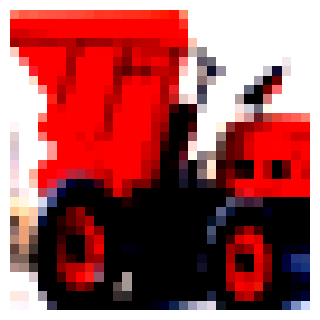

In [49]:
dataiter = iter(train_data_loader)

img, label = next(dataiter)

for i in range(100):
    if label[i]==9:
        print(label[i])
        imShow2(torchvision.utils.make_grid(img[i]), label[i])
        break

In [15]:
label[0]==3

tensor(True)